<a href="https://colab.research.google.com/github/MarufAnsari/Predict_retail_item_price/blob/main/Predict_retail_item_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predict Retail Item Price**
###**(MachineHack : The Great Indian Hiring Hackathon)**

###**Problem Statement** :
To predict the price of retail items belonging to different categories.

In [2]:
# import packages needed for the procedure 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###**DataSet :**

Train.csv - 284780 rows x 8 columns (Inlcudes UnitPrice Columns as Target)

Test.csv - 122049 rows x 7 columns

Sample Submission.csv - 122049 rows x 1 column

In [3]:
#read sample submission data as csv file
df_sample_sub = pd.read_csv('https://raw.githubusercontent.com/MarufAnsari/Predict_retail_item_price/main/Dataset/Sample%20Submission.csv')

#check the dimension of the table
print("The dimension of the table is  : ", df_sample_sub.shape)
print("")
df_sample_sub.head(10)

The dimension of the table is  :  (122049, 1)



UnitPrice
0        100
1        100
2        100
3        100
4        100
5        100
6        100
7        100
8        100
9        100

**Attribute Description:**

Invoice No - Invoice ID, encoded as Label

StockCode - Unique code per stock, encoded as Label

Description - The Description, encoded as Label

Quantity - Quantity purchased

InvoiceDate - Date of purchase

UnitPrice - The target value, price of every product

CustomerID - Unique Identifier for every country

Country - Country of sales, encoded as Label

In [4]:
#read test data as csv file
df_test = pd.read_csv('https://raw.githubusercontent.com/MarufAnsari/Predict_retail_item_price/main/Dataset/Test.csv')

#check the dimension of the table
print("The dimension of the table is  : ", df_test.shape)
print("")
df_test.head(10)

The dimension of the table is  :  (122049, 7)



InvoiceNo  StockCode  Description  ...          InvoiceDate CustomerID  Country
0       3139       1709         1079  ...  2011-02-22 15:22:00    16161.0       35
1        617        510         3457  ...  2010-12-08 12:46:00    17341.0       35
2      14653        604          694  ...  2011-10-25 13:53:00    15158.0       35
3       8634       1478         3473  ...  2011-06-27 12:38:00    16033.0       35
4      15546       3216          871  ...  2011-11-06 16:14:00    15351.0       35
5       8348       1817          697  ...  2011-06-20 13:27:00    12432.0       24
6      17034        262         3147  ...  2011-11-22 16:26:00    13985.0       35
7       3701       1323         2000  ...  2011-03-08 17:23:00    14507.0       35
8      16983       2327         1121  ...  2011-11-22 12:52:00    15150.0       35
9      14396       2216         1912  ...  2011-10-20 13:24:00    14911.0       10

[10 rows x 7 columns]

In [5]:
#read training data as csv file
df_train = pd.read_csv('https://raw.githubusercontent.com/MarufAnsari/Predict_retail_item_price/main/Dataset/Train.csv')

#check the dimension of the table
print("The dimension of the table is  : ", df_train.shape)
print("")
df_train.head(10)

The dimension of the table is  :  (284780, 8)



InvoiceNo  StockCode  Description  ...  UnitPrice CustomerID  Country
0       6141       1583          144  ...       3.75    14056.0       35
1       6349       1300         3682  ...       1.95    13098.0       35
2      16783       2178         1939  ...       5.95    15044.0       35
3      16971       2115         2983  ...       0.83    15525.0       35
4       6080       1210         2886  ...       1.65    13952.0       35
5      17388        495         3247  ...       1.65    15351.0       35
6      18494        165         3377  ...       1.25    12748.0       35
7      17109       2597         3435  ...       1.25    16255.0       35
8      17143       1945         2352  ...       5.75    17841.0       35
9       8422       3311         2502  ...       2.95    13849.0       35

[10 rows x 8 columns]

###**Exploratory Data Analysis :**

We can drop InvoiceDate and InvoiceNo columns as it is not required in the model building.

In [6]:
#Drop irrelavant attributes from the test dataset
df_test = df_test.drop(['InvoiceDate', 'InvoiceNo'], 1, inplace = False)
df_test.head()

StockCode  Description  Quantity  CustomerID  Country
0       1709         1079         3     16161.0       35
1        510         3457         1     17341.0       35
2        604          694        36     15158.0       35
3       1478         3473         2     16033.0       35
4       3216          871         1     15351.0       35

In [7]:
df_test.describe()

StockCode    Description  ...     CustomerID        Country
count  122049.000000  122049.000000  ...  122049.000000  122049.000000
mean     1572.955788    2026.412744  ...   15286.445256      32.836795
std       845.106082    1087.697388  ...    1711.887591       6.726816
min         0.000000       0.000000  ...   12347.000000       0.000000
25%       937.000000    1147.000000  ...   13953.000000      35.000000
50%      1523.000000    1987.000000  ...   15152.000000      35.000000
75%      2106.000000    2945.000000  ...   16782.000000      35.000000
max      3683.000000    3895.000000  ...   18287.000000      36.000000

[8 rows x 5 columns]

In [8]:
#check if there any null values in the dataset
df_test.isnull().sum()

StockCode      0
Description    0
Quantity       0
CustomerID     0
Country        0
dtype: int64

As nothing is null here so no need to bother because of missing data.

In [9]:
#what is the skewness in the train data
df_test.skew()

StockCode       0.266920
Description    -0.132740
Quantity      -26.063548
CustomerID      0.030557
Country        -3.059695
dtype: float64

In [10]:
#Drop irrelavant attributes from the train dataset
df_train = df_train.drop(['InvoiceDate','InvoiceNo'],1, inplace= False)
df_train.head()

StockCode  Description  Quantity  UnitPrice  CustomerID  Country
0       1583          144         3       3.75     14056.0       35
1       1300         3682         6       1.95     13098.0       35
2       2178         1939         4       5.95     15044.0       35
3       2115         2983         1       0.83     15525.0       35
4       1210         2886        12       1.65     13952.0       35

In [11]:
df_train.describe()

StockCode    Description  ...     CustomerID        Country
count  284780.000000  284780.000000  ...  284780.000000  284780.000000
mean     1573.386807    2023.955573  ...   15288.224278      32.823846
std       843.604991    1089.812078  ...    1714.336529       6.743602
min         0.000000       0.000000  ...   12346.000000       0.000000
25%       939.000000    1141.000000  ...   13953.000000      35.000000
50%      1521.000000    1987.000000  ...   15152.000000      35.000000
75%      2106.000000    2945.000000  ...   16794.000000      35.000000
max      3683.000000    3895.000000  ...   18287.000000      36.000000

[8 rows x 6 columns]

In [12]:
#check if there any null values in the dataset
df_train.isnull().sum()

StockCode      0
Description    0
Quantity       0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

As nothing is null here so no need to bother because of missing data.

In [13]:
#what is the skewness in the train data
df_train.skew()

StockCode        0.271247
Description     -0.133967
Quantity         0.226115
UnitPrice      438.340508
CustomerID       0.029524
Country         -3.050125
dtype: float64

###**Visualization of Data attributes :**

First let's visualize the **Test Data**.

As all the features are numerical here we can visualize them all by **Histogram** using **Matplotlib**.

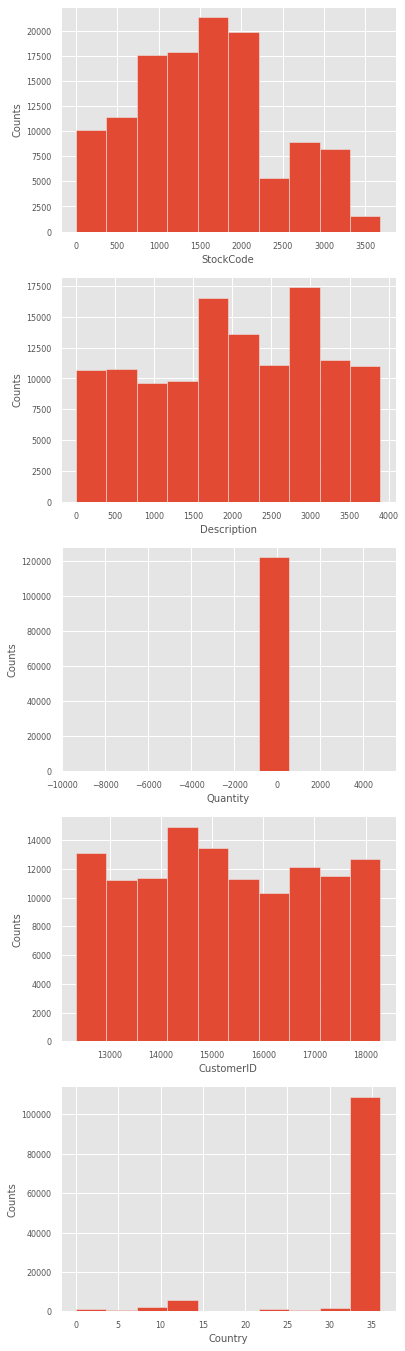

In [69]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (6,24)

# make subplots
fig, axes = plt.subplots(nrows=5, ncols=1)

# specify the features of interest
num_features = ['StockCode','Description','Quantity','CustomerID','Country']
x_axes = num_features
y_axes = ['Counts','Counts','Counts','Counts','Counts']

#draw histograms
axes = axes.ravel()
plt.style.use('ggplot')
for idx, ax in enumerate(axes) :
  ax.hist(df_test[num_features[idx]].dropna(),bins=10)
  ax.set_xlabel(x_axes[idx],fontsize=10)
  ax.set_ylabel(y_axes[idx],fontsize=10)
  ax.tick_params(axis='both',labelsize=8)

Using **Seaborn** we can find out **Correlation** between each of the feature attributes of the **Test Data**

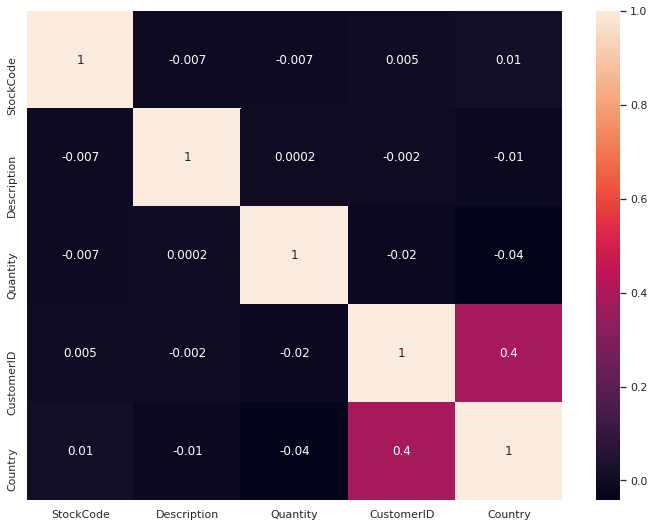

In [15]:
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(df_test.corr(), annot = True, fmt='.1g')

only correlation between country & Customer ID is strong i.e. 40%

Thus the data is not that highly collinear so the overfitting issue may not be encountered

Now let's display **ScatterPlot** for the feature attributes of the **Test Data** using **Seaborn**

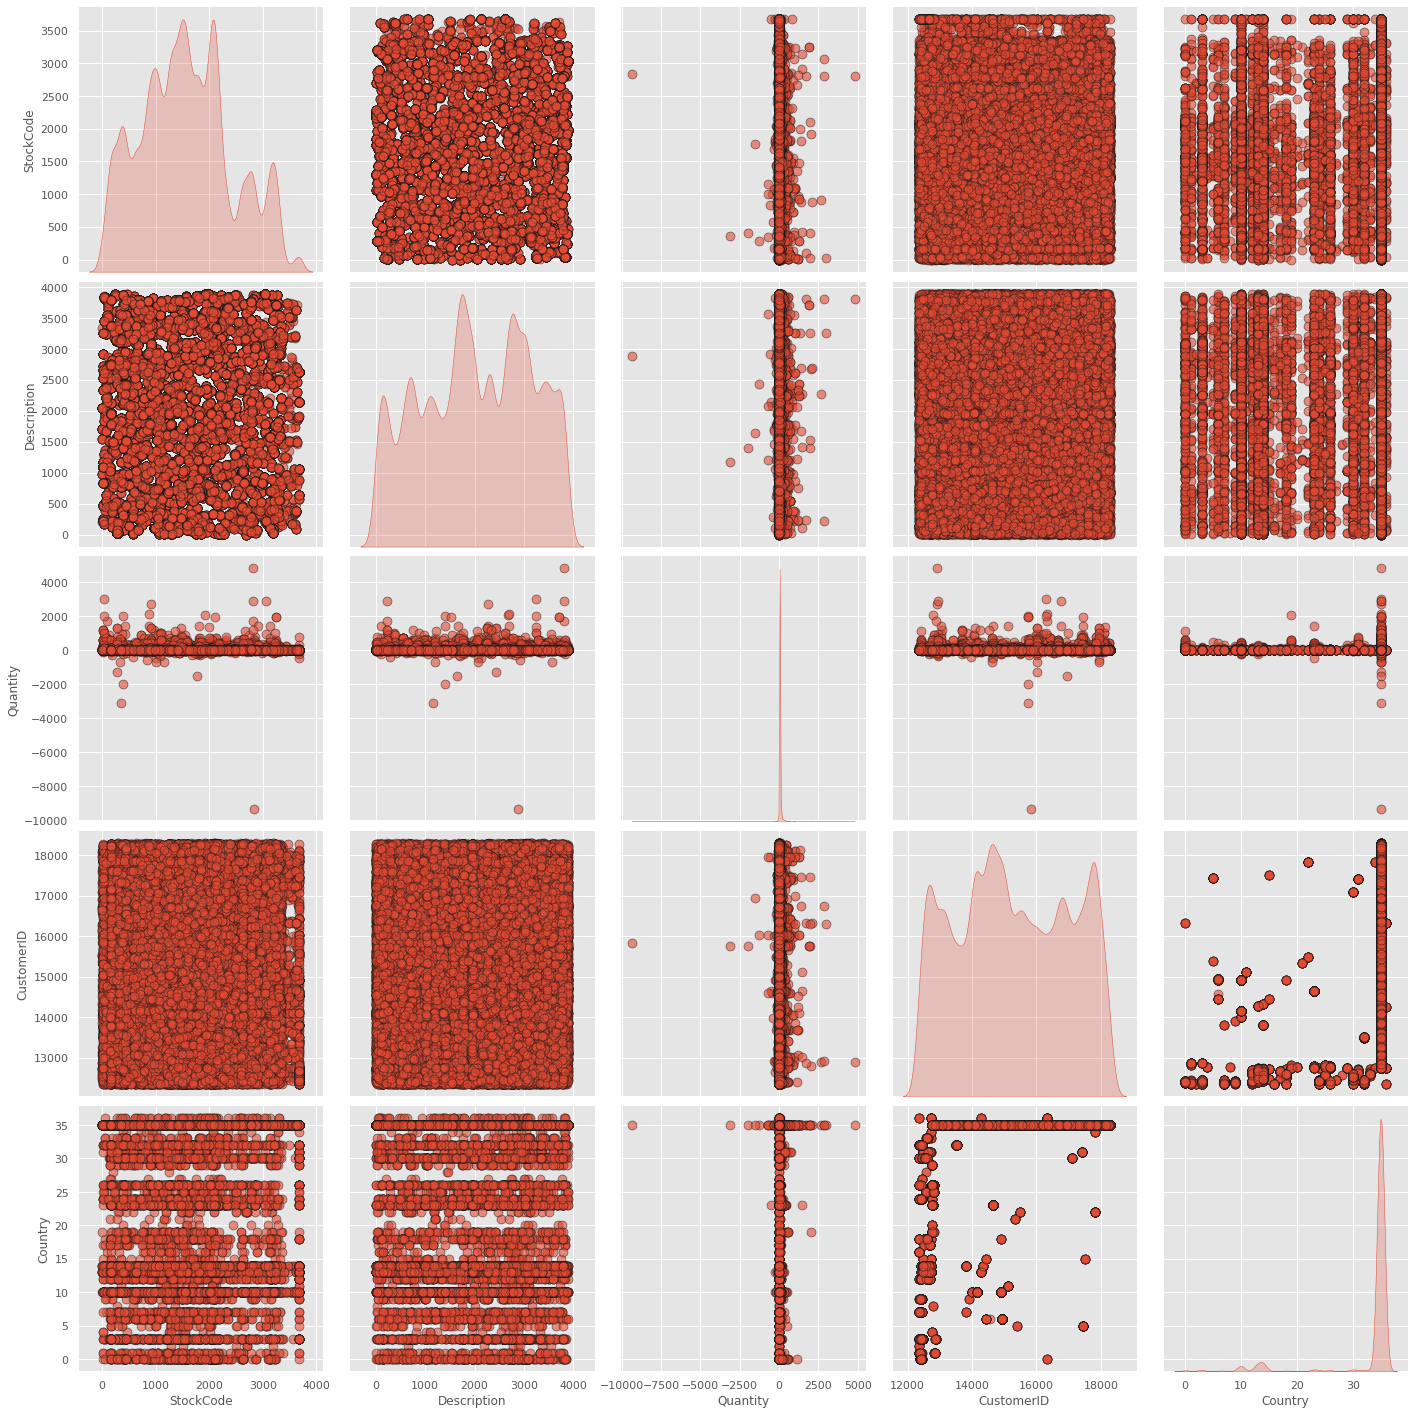

In [70]:
# Create a pair plot colored by continent with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(df_test, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 4)

Now visualize the **Train Data**.

As all the features are numerical here we can visualize them all by **Histogram** using **Matplotlib**.

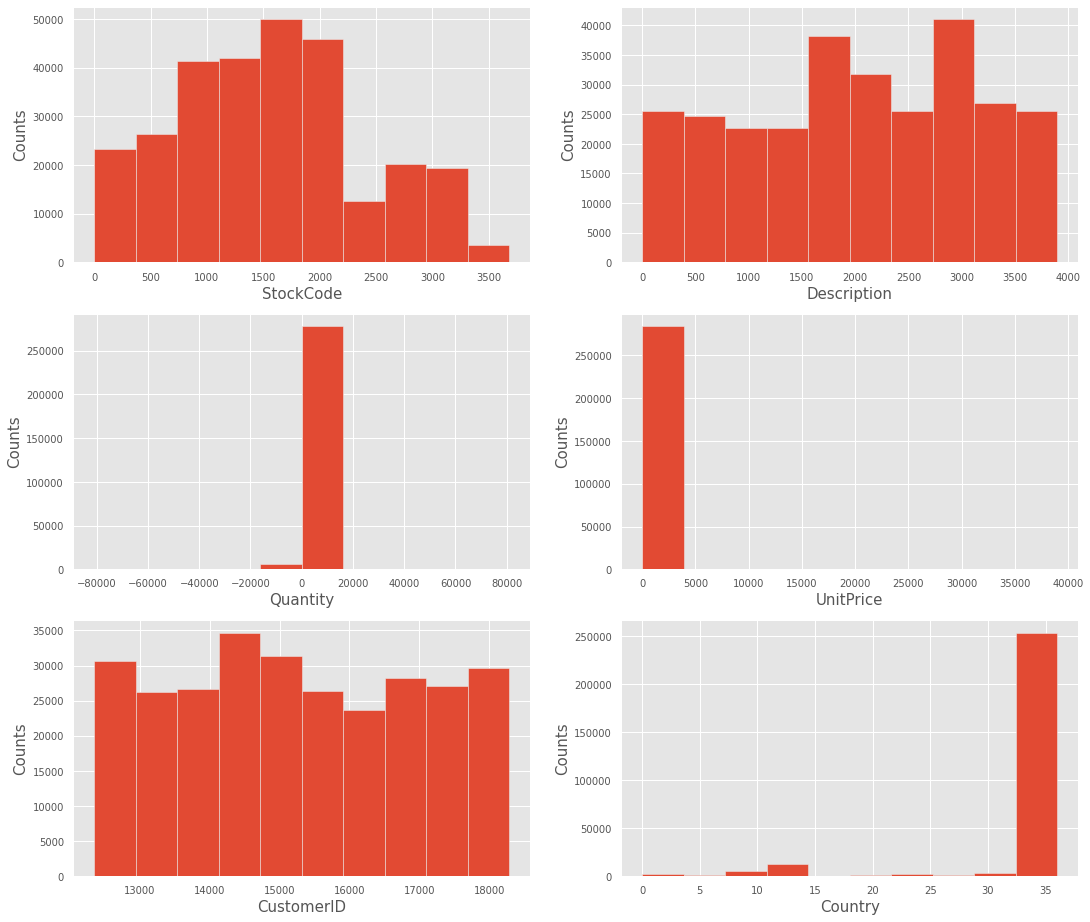

In [71]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,16)

# make subplots
fig, axes = plt.subplots(nrows=3, ncols=2)

# specify the features of interest
num_features = ['StockCode','Description','Quantity','UnitPrice','CustomerID','Country']
x_axes = num_features
y_axes = ['Counts','Counts','Counts','Counts','Counts','Counts']

#draw histograms
axes = axes.ravel()
plt.style.use('ggplot')
for idx, ax in enumerate(axes) :
  ax.hist(df_train[num_features[idx]].dropna(), bins=10)
  ax.set_xlabel(x_axes[idx],fontsize=15)
  ax.set_ylabel(y_axes[idx],fontsize=15)
  ax.tick_params(axis='both',labelsize=10)

Using **Seaborn** we can find out **Correlation** between each of the feature attributes of the **Train Data**

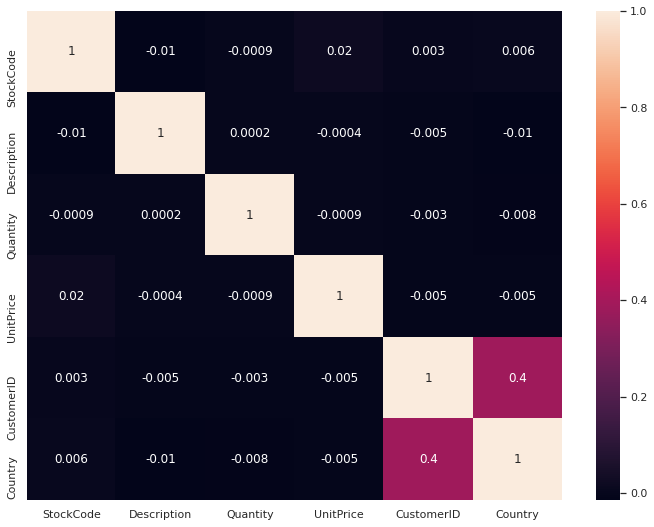

In [18]:
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(df_train.corr(), annot = True, fmt='.1g')

only correlation between country & Customer ID is strong i.e. 40%

Thus the data is not that highly collinear so the overfitting issue may not be encountered

Now let's display **ScatterPlot** for the feature attributes of the **Train Data** using **Seaborn**

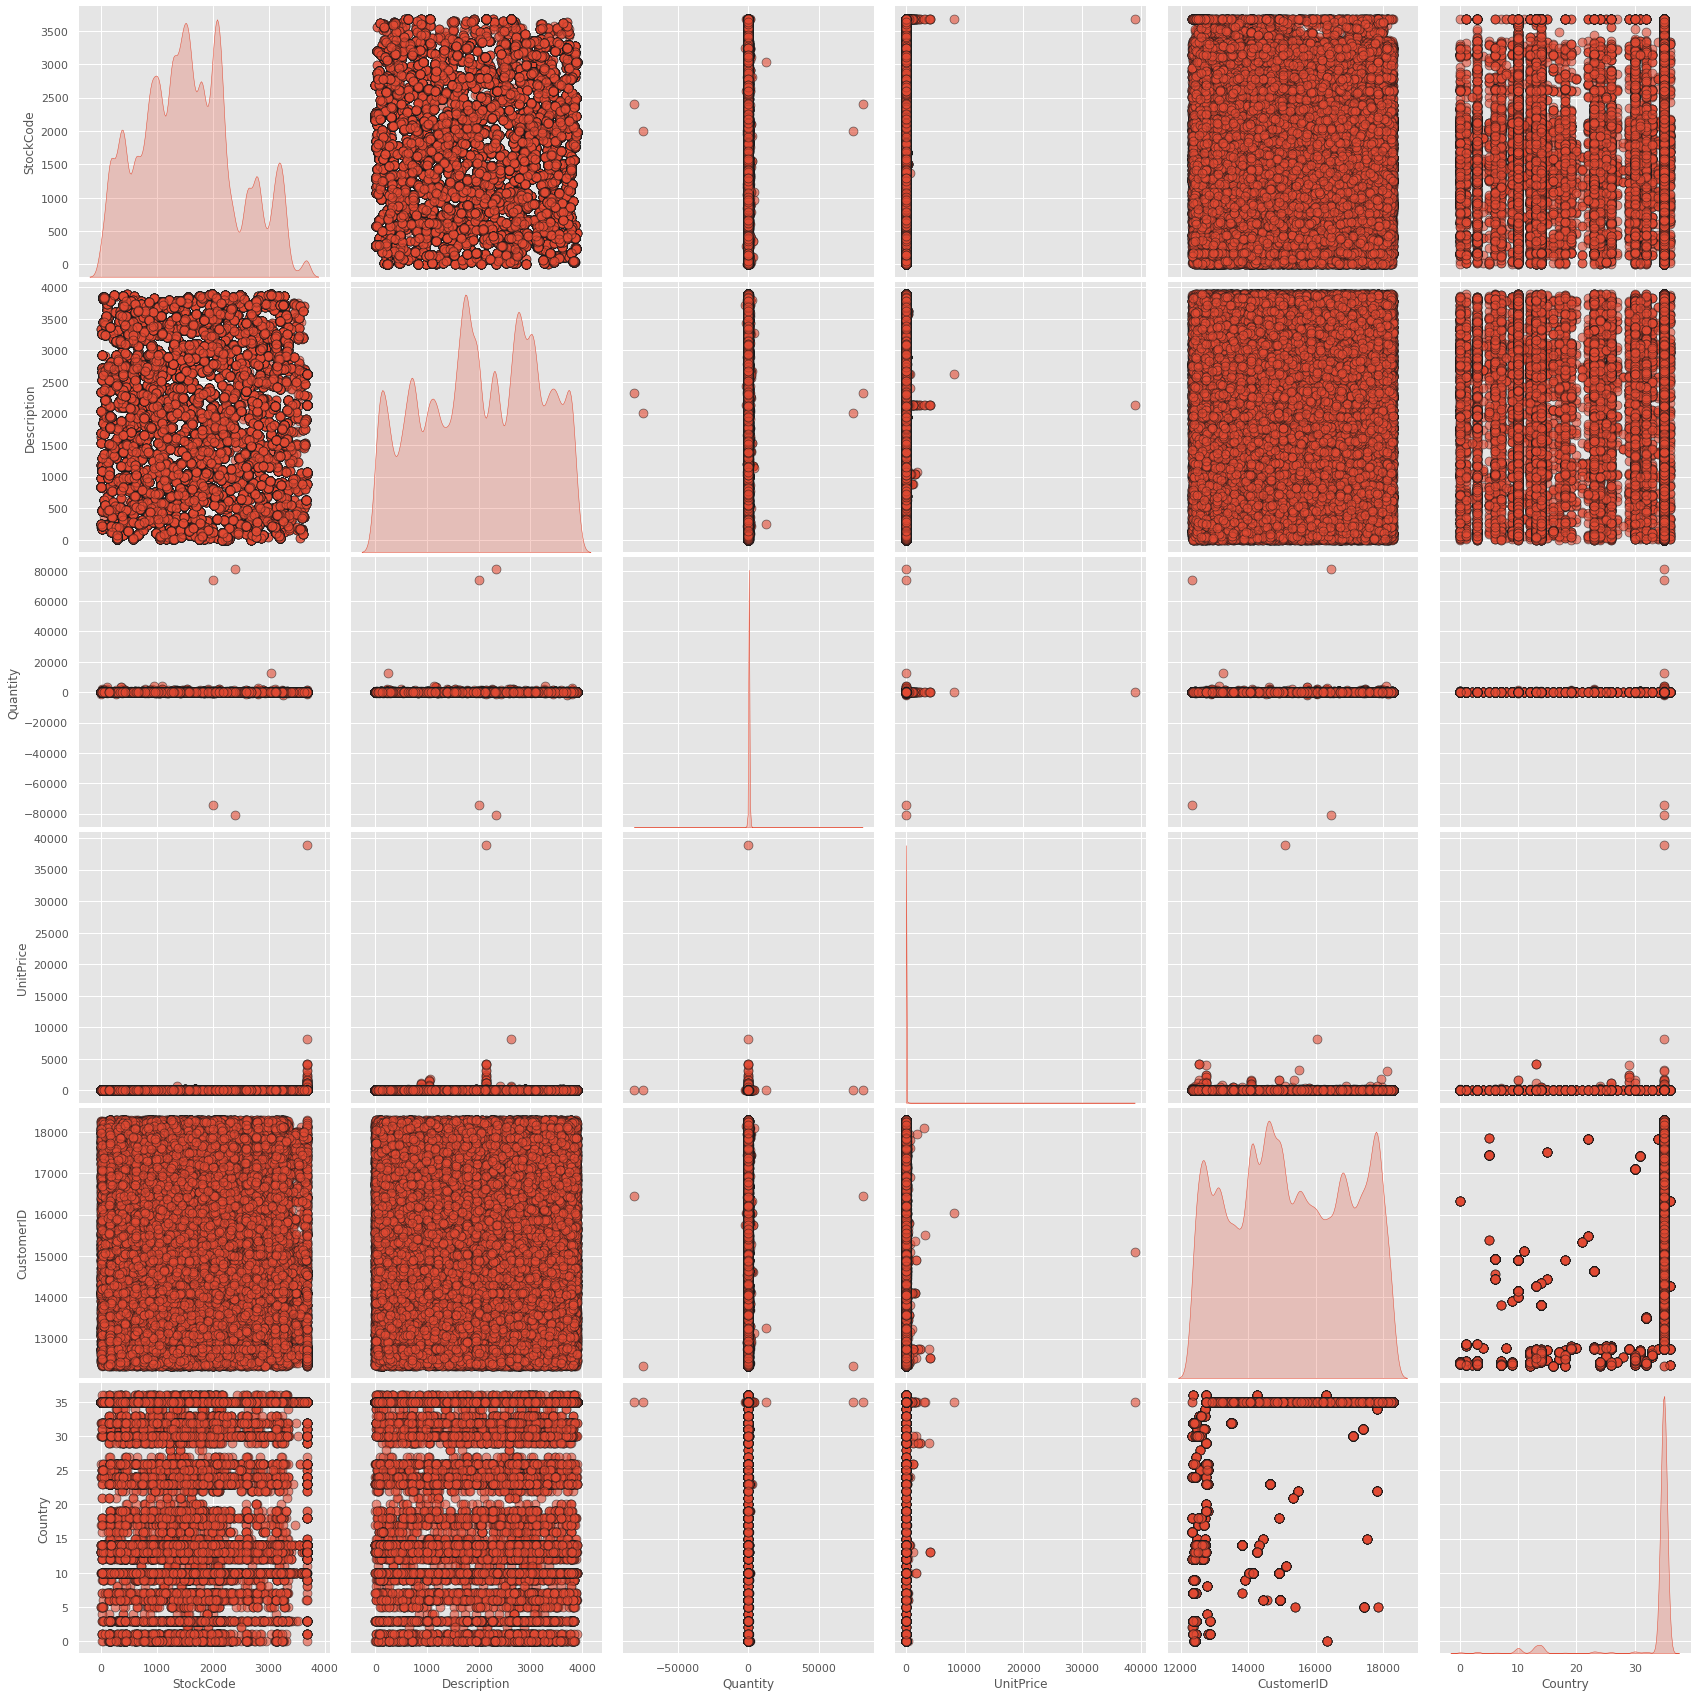

In [72]:
# Create a pair plot colored by continent with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(df_train, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 4)

###**Feature Engineering :**
Let's split the target variable from the train data and remove skewness of the unit price (target variable) as observed above.

In [20]:
# fetch target and dependent variables in y, X respectively
X = pd.get_dummies(df_train[['StockCode','Description','Quantity','CustomerID','Country']])
y = df_train['UnitPrice']

#lets handle the skewness with tranforming the data
from sklearn.preprocessing import PowerTransformer
y = y.values.reshape(-1,1)
pow = PowerTransformer(method = 'yeo-johnson', standardize=True)
#the box cox transformation is also one method that could be used but that requires strictly positive data
#other transformation like square root, log transformation are also few options
y = pow.fit_transform(y)
print(y)

[[ 0.78791467]
 [ 0.01363741]
 [ 1.28323652]
 ...
 [ 1.62312149]
 [ 0.69279064]
 [-1.08556989]]


In [ ]:
sns.distplot(y)

In [21]:
#Copying first 122049 rows of actual target variable from the train data to find out RMSE with predicted target variable 
y_new1=y[0:122049]
y_new1

array([[ 0.78791467],
       [ 0.01363741],
       [ 1.28323652],
       ...,
       [-0.95400172],
       [-0.18857425],
       [-0.51952138]])

In [22]:
#Copying next 122049 rows of actual target variable from the train data to find out RMSE with predicted target variable 
y_new2=y[122050:244099]
y_new2

array([[ 0.51050554],
       [ 1.76035459],
       [ 0.33740435],
       ...,
       [ 1.0927452 ],
       [-0.51952138],
       [-0.18857425]])

###**Model Building :**
Here we are training a **Multivariate Linear Regression** model to predict the retail price (target variable) using multiple feature attributes.

In [37]:
#import linear regression model from sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import xgboost
import warnings
warnings.filterwarnings("ignore")

In [24]:
# Split data into train and test format
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

**XGBoost with Hyperparamter Tunig -**

In [28]:
regressor = xgboost.XGBRegressor()
regressor.fit(X_train,y_train)

#Hyperparamter Optimization
n_estimators = [100,500,900,1100,1500]
max_depth = [2,3,5,10,15]
booster = ['gbtree','gblinear']
learning_rate = [0.05,0.10,0.15,0.20]
min_child_weight = [1,2,3,4]
base_score = [0.25,0.50,0.75,1]
#Define the grid of paramters to search
hyperparamter_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'booster' : booster,
    'learning_rate' : learning_rate,
    'min_child_weight' : min_child_weight,
    'base_score' : base_score
}

# Set-up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator = regressor,
                               param_distributions=hyperparamter_grid,
                               cv=5, n_iter=10,
                               scoring='neg_mean_absolute_error',
                               n_jobs=4, verbose=5,
                               return_train_score=True,
                               random_state=42
                               )
random_cv.fit(X_train,y_train)

random_cv.best_estimator_

[06:37:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  5.4min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed: 25.0min finished


[07:02:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=15, min_child_weight=4, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [39]:
# Taking the optimized model parameters and training xgboost
regressor = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=15, min_child_weight=4, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
regressor.fit(X,y)
predicted_xgb = regressor.predict(df_test)

[07:19:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


**Linear Regression -**

In [41]:
# Training multivariate Linear Regression model
lrgr = LinearRegression()
lrgr.fit(X_train,y_train)
predicted_lrgr = lrgr.predict(df_test)

**KNearest Neighbour -**

In [42]:
# Finding out optimized value of k for training knn
score = []
for k in range(1,20):    
    clf = KNeighborsRegressor(n_neighbors = k,  weights = 'distance', p=1)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test))
k_max = score.index(max(score))+1
print( "At K = {}, Max Accuracy = {}".format(k_max, max(score)*100))

At K = 3, Max Accuracy = 82.83589049264012


Text(0, 0.5, 'Cross-Validated Accuracy')

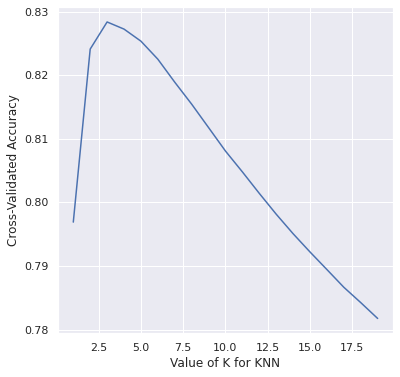

In [47]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
%matplotlib inline
plt.rcParams['figure.figsize'] = (6,6)
plt.plot(range(1,20), score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [48]:
# Training KNNN model for regression
kn = KNeighborsRegressor(n_neighbors = k_max,  weights = 'distance', p=1)
kn.fit(X, y)   
predicted_knn = kn.predict(df_test)

###**Model Evalautation :**
We are using R**oot Mean Square Error (RMSE)** here to evaluate our model

In [49]:
#check the RMSE score for the xgboost model for first 122049 rows of the target vairable
from sklearn import metrics
Rmse = np.sqrt(metrics.mean_squared_error(y_new1, predicted_xgb))
print(Rmse)

1.3928509666281503


In [50]:
#check the RMSE score for the xgboost model for next 122049 rows of the target vairable
from sklearn import metrics
Rmse = np.sqrt(metrics.mean_squared_error(y_new2, predicted_xgb))
print(Rmse)

1.3897758291370883


In [51]:
#check the RMSE score for the linear regression model for first 122049 rows of the target vairable
from sklearn import metrics
Rmse = np.sqrt(metrics.mean_squared_error(y_new1, predicted_lrgr))
print(Rmse)

1.0061336274519586


In [52]:
#check the RMSE score for the linear regression model for next 122049 rows of the target vairable
from sklearn import metrics
Rmse = np.sqrt(metrics.mean_squared_error(y_new2, predicted_lrgr))
print(Rmse)

1.005057206480666


In [53]:
#check the RMSE score for the KNN model for next 122049 rows of the target vairable
from sklearn import metrics
Rmse = np.sqrt(metrics.mean_squared_error(y_new1, predicted_knn))
print(Rmse)

1.3868574234509525


In [54]:
#check the RMSE score for the KNN model for next 122049 rows of the target vairable
from sklearn import metrics
Rmse = np.sqrt(metrics.mean_squared_error(y_new2, predicted_knn))
print(Rmse)

1.3834134227204158


###**Result and Submission :**

In [56]:
#Converting predicted result of xgboost into pandas dataframe
result_xgb = pd.DataFrame(data=predicted_xgb)
result_xgb.head()

0
0 -0.151995
1 -0.506189
2  0.645365
3 -0.226603
4  1.957572

In [57]:
#inverse the power transform to convert data to back to original form of unit price
transform_inv_xgb = pow.inverse_transform(result_xgb)
transform_inv_xgb

array([[1.700737 ],
       [1.2642906],
       [3.311048 ],
       ...,
       [1.2205713],
       [3.9591918],
       [3.9703264]], dtype=float32)

In [58]:
#Converting final transformed result into pandas dataframe
output_result_xgb = pd.DataFrame(data = transform_inv_xgb, columns = ['UnitPrice'])
output_result_xgb

UnitPrice
0        1.700737
1        1.264291
2        3.311048
3        1.598769
4       12.703762
...           ...
122044   0.459134
122045   1.681604
122046   1.220571
122047   3.959192
122048   3.970326

[122049 rows x 1 columns]

In [59]:
#Converting the resultant dataframe of xgboost to be submitted into csv file
output_result_xgb.to_csv("Submission_xgb.csv", index=False)

In [60]:
#Converting predicted result of Linear Regression into pandas dataframe
result_lrgr = pd.DataFrame(data=predicted_lrgr)
result_lrgr.head()

0
0  0.026108
1 -0.173688
2 -0.097480
3 -0.052573
4  0.215208

In [61]:
#inverse the power transform to convert data to back to original form of unit price
transform_inv_lrgr = pow.inverse_transform(result_lrgr)
transform_inv_lrgr

array([[1.97016617],
       [1.67047151],
       [1.77913112],
       ...,
       [1.83781285],
       [1.94455775],
       [2.05798236]])

In [62]:
#Converting  final transformed result into pandas dataframe
output_result_lrgr = pd.DataFrame(data = transform_inv_lrgr, columns = ['UnitPrice'])
output_result_lrgr

UnitPrice
0        1.970166
1        1.670472
2        1.779131
3        1.846332
4        2.303473
...           ...
122044   2.125615
122045   2.287853
122046   1.837813
122047   1.944558
122048   2.057982

[122049 rows x 1 columns]

In [63]:
#Converting the resultant dataframe of Linear Regression to be submitted into csv file
output_result_lrgr.to_csv("Submission_lrgr.csv", index=False)

In [64]:
#Converting predicted result of KNN into pandas dataframe
result_knn = pd.DataFrame(data=predicted_knn)
result_knn.head()

0
0 -0.188574
1 -0.519521
2  0.827562
3 -0.196114
4  1.960363

In [65]:
#inverse the power transform to convert data to back to original form of unit price
transform_inv_knn = pow.inverse_transform(result_knn)
transform_inv_knn

array([[1.65      ],
       [1.25      ],
       [3.88417208],
       ...,
       [1.25      ],
       [6.31501274],
       [4.15      ]])

In [66]:
#Converting  final transformed result into pandas dataframe
output_result_knn = pd.DataFrame(data = transform_inv_knn, columns = ['UnitPrice'])
output_result_knn

UnitPrice
0        1.650000
1        1.250000
2        3.884172
3        1.639722
4       12.750000
...           ...
122044   0.380186
122045   1.690000
122046   1.250000
122047   6.315013
122048   4.150000

[122049 rows x 1 columns]

In [67]:
#Converting the resultant dataframe of KNN to be submitted into csv file
output_result_knn.to_csv("Submission_knn.csv", index=False)

**To the future,**

**Maruf Ansari**